In [75]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
from sklearn.cluster import KMeans


In [76]:
# Data loading
file_path = Path("myopia.csv")
df_myopia = pd.read_csv(file_path)
df_myopia.head(10)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
5,6,1.744,22.139999,3.224,3.556,15.36,10,6,2,1,19,44,0,1,0
6,6,0.683,22.330000,3.186,3.654,15.49,12,7,2,1,8,36,0,1,0
7,6,1.272,22.389999,3.732,3.584,15.08,12,0,0,0,8,8,0,0,0
8,7,1.396,22.620001,3.464,3.408,15.74,4,0,3,1,3,12,0,0,0
9,6,0.972,22.740000,3.504,3.696,15.54,30,5,1,0,10,27,0,0,0


In [77]:
df_myopia.dtypes

AGE            int64
SPHEQ        float64
AL           float64
ACD          float64
LT           float64
VCD          float64
SPORTHR        int64
READHR         int64
COMPHR         int64
STUDYHR        int64
TVHR           int64
DIOPTERHR      int64
MOMMY          int64
DADMY          int64
MYOPIC         int64
dtype: object

In [78]:
# Remove the MYOPIC column
df_myopia = df_myopia.drop(columns=["MYOPIC"])
df_myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [79]:
# Remove all rows with null values
for column in df_myopia.columns:
        print(f"Column {column} has {df_myopia[column].isnull().sum()} null values")

Column AGE has 0 null values
Column SPHEQ has 0 null values
Column AL has 0 null values
Column ACD has 0 null values
Column LT has 0 null values
Column VCD has 0 null values
Column SPORTHR has 0 null values
Column READHR has 0 null values
Column COMPHR has 0 null values
Column STUDYHR has 0 null values
Column TVHR has 0 null values
Column DIOPTERHR has 0 null values
Column MOMMY has 0 null values
Column DADMY has 0 null values


In [80]:
# Find and remove duplicate entries
print(f"Duplicate entries: {df_myopia.duplicated(). sum()}")

Duplicate entries: 0


In [81]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_myopia[['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR', 'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY']])

In [82]:
df_myopia.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY'],
      dtype='object')

In [83]:
df_myopia.count

<bound method DataFrame.count of      AGE  SPHEQ         AL    ACD     LT    VCD  SPORTHR  READHR  COMPHR  \
0      6 -0.052  21.889999  3.690  3.498  14.70       45       8       0   
1      6  0.608  22.379999  3.702  3.392  15.29        4       0       1   
2      6  1.179  22.490000  3.462  3.514  15.52       14       0       2   
3      6  0.525  22.200001  3.862  3.612  14.73       18      11       0   
4      5  0.697  23.290001  3.676  3.454  16.16       14       0       0   
..   ...    ...        ...    ...    ...    ...      ...     ...     ...   
613    6  0.678  22.400000  3.663  3.803  14.93        2       0       7   
614    6  0.665  22.500000  3.570  3.378  15.56        6       0       1   
615    6  1.834  22.940001  3.624  3.424  15.89        8       0       0   
616    6  0.665  21.920000  3.688  3.598  14.64       12       2       1   
617    6  0.802  22.260000  3.530  3.484  15.25       25       0       2   

     STUDYHR  TVHR  DIOPTERHR  MOMMY  DADMY  
0       

In [84]:
# Create a dataframe with the transformed data
new_df_myopia = pd.DataFrame(scaled_data, columns=df_myopia.columns[0:])
new_df_myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769


In [85]:
# Perform dimensionality reduction with PCA

# Initialize PCA model
pca = PCA(n_components=2)

# Get two principal components for the myopia data
myopia_pca = pca.fit_transform(new_df_myopia)

In [86]:
# Transform PCA data to a DataFrame
df_myopia_pca = pd.DataFrame(
    data=myopia_pca, columns=["principal component 1", "principal component 2"]
)
df_myopia_pca.head()

,principal component 1,principal component 2
0,0.535503,1.145004
1,-0.624706,-1.575786
2,-0.933479,-0.717076
3,0.106354,1.192475
4,-0.388503,-2.839655


In [87]:
# Further reduce the dataset dimensions with t-SNE and visually inspect the results
# To do this, run t-SNE on the principal components, which is the output of the PCA transformation.

# Initialize t-SNE model
tsne = TSNE(learning_rate=35)

In [88]:
# Reduce dimensions
tsne_features = tsne.fit_transform(df_myopia_pca)

C:\Users\cathy\anaconda3\envs\PythonData\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [89]:
# The dataset has 2 columns
tsne_features.shape

(618, 2)

In [90]:
# Create a scatter plot of the t-SNE output
# Prepare to plot the dataset
# automatically reducing it to two columnns

# The first column of transformed features
df_myopia_pca['x'] = tsne_features[:,0]

# The second column of transformed features
df_myopia_pca['y'] = tsne_features[:,1]

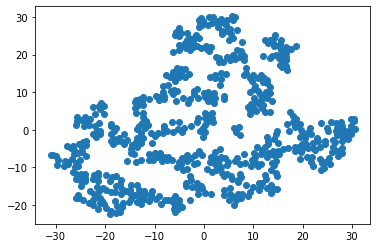

In [91]:
# Visualize the clusters

plt.scatter(df_myopia_pca['x'], df_myopia_pca['y'])
plt.show()

In [105]:
# Initializing model with K = 14

model = KMeans(n_clusters=14, random_state=5)

In [106]:
# Fitting model
model.fit(new_df_myopia)

KMeans(n_clusters=14, random_state=5)

In [107]:
# Get predictions
# creating a new column in our dataset called "class"
# and that will be the labels for the model
# manually inputting those predictions

predictions = model.predict(new_df_myopia)
print(predictions)

[10  3  4 10  1 12 12  4 11  4  2  3  4 11  5 11 11  5 13  4 12  9 12 10
  9  4  3  1  3  1  7 13  3 12  5  5 13  9 12  9  6 11 13  5  7  9 13  9
  7  3  6 12 12  7  9 12  3  3 12 12  9  1 11  9  8  5  4  9  5  0 10 13
  2 13  9  1 11  8 12  4  6 12  7  5 12  3 10  3  1  3 11  4  3  9 12  8
 12  3  5  5 13  4 10  4 10 10  4 11  6 12  2  9  3  3  3  6  5 12  3 12
  6  4  3 11  2 10  4  1  6  0  7 12  5 11  6  9 11  7  4  9  7  9  6  9
  6  3 12 13  1  8  7  4 10  3  4  4  7  3  1  1 12  9  9  9  1 11 13 12
  5  4  3  6 10  4  0  9  1  6  7  1  9 10  4  1 11 13  7  6  9  3  3  5
  3  9  6 10  4  9  6  7  7  0  9  4 11  6  7  9  6  3  8  1  3  6  7  5
  8 12  9  8  3 12  8  4  4 10  2  3  4  9 13  5  7 13  1  3  6  5 11 11
 13  7  0 12  7 12  1  7 13 12  5 13  6 13  7  7  7  7  5 12 13  4  7  3
  6 11  6  3  4 12  9 11 11 13  9  7 12  7  8 10  3  2  3 10  3  1 11 10
 12 11  4 12  1  4  2  4  4 12 13 12  4  1  6 13  5  1 13  4  9 13 10  6
 12  3  6  6  7  9  6 13  9  6  5 10  6  4  4  6 11

In [108]:
# Add a new class column to new_df_myopia
new_df_myopia["class"] = model.labels_
kmeans_df_myopia = new_df_myopia
kmeans_df_myopia

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,class
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241,10
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241,3
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769,4
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241,10
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,-0.420219,-0.196686,-0.142410,0.366499,1.694021,-0.673220,-1.250096,-0.912062,1.602740,0.681765,0.884045,0.685585,0.987138,-0.996769,7
614,-0.420219,-0.217472,0.004738,-0.037486,-1.058674,0.276082,-0.747700,-0.912062,-0.361875,-0.672996,-0.165935,-0.999941,0.987138,1.003241,3
615,-0.420219,1.651696,0.652187,0.197086,-0.760735,0.773335,-0.496502,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,1.003241,3
616,-0.420219,-0.217472,-0.848716,0.475096,0.366251,-1.110201,0.005894,-0.259684,-0.361875,-0.672996,1.059042,-0.188392,-1.013030,-0.996769,4


In [109]:
# empty container to hold the scores
# inertia is the sum of squared distances of samples to the closest center
# how far is a point from its center
# want to see the inflection point b/c that will be the drop off
inertia = []

In [110]:
# create a list of k
# Same as k = list(range(1, 14))
k = [1,2,3,4,5,6,7,8,9,10,11,12,13]

In [111]:
# Looking for the best k
# in class, used "for each in k:""
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(kmeans_df_myopia)
    inertia.append(km.inertia_)


C:\Users\cathy\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


In [112]:
# Define a DataFrame to plot the Elbow Curve using hvPlot
# set elbow_data as a model dictionary
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

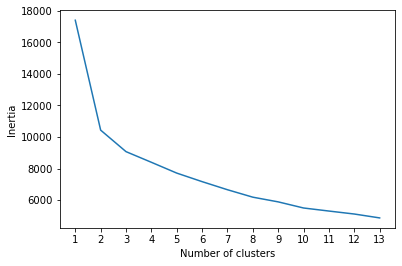

In [115]:
# plot the inertia and k
# x is the k, y is the inertia score
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,14))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [116]:
df_elbow.head()

,k,inertia
0,1,17404.338188
1,2,10434.981529
2,3,9070.725166
3,4,8395.142735
4,5,7710.332682


The K-means model found an elbow at 2 clusters. Patients can be clustered together.